In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [2]:
# Import data
data = pd.read_csv("../Datasets/osaka.csv") 
city_name = 'Osaka' 
indicator='cases'

In [3]:
if(indicator == 'deaths'):
    #deaths
    acc_data = data.cumulative_deceased
else:
    # cases
    #acc_data = data.total_confirmed
    acc_data = data.cumulative_confirmed #(Japan)

normalized_acc_data = acc_data / max(acc_data)
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = normalized_acc_data.tolist()

if(indicator == 'deaths'):
    daily_data = data.new_deceased
else:
    daily_data = data.new_confirmed


scaling_factor = 500
acc_data = acc_data / scaling_factor
daily_data = list(daily_data/ scaling_factor)

In [4]:
# daily_data = data.current_hospitalized_patients.tolist()
# acc_data = []
# for i in range(len(daily_data)):
#     acc_data.append(np.sum(daily_data[:i]))

# acc_data = np.array(acc_data)
# normalized_acc_data = acc_data / max(acc_data)
# t = np.linspace(0, len(acc_data)-1, len(acc_data))

# scaling_factor = 1

# acc_data = acc_data / scaling_factor
# daily_data = list(data.current_hospitalized_patients/ scaling_factor)


In [5]:
# Initial Conditions

def initial_cond_0(y_t):
    #A0 = 100
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    tp0 += 150 
    A0 *= 0.005
    return [A0, tp0]
optimize.update_cond = update_cond_nw

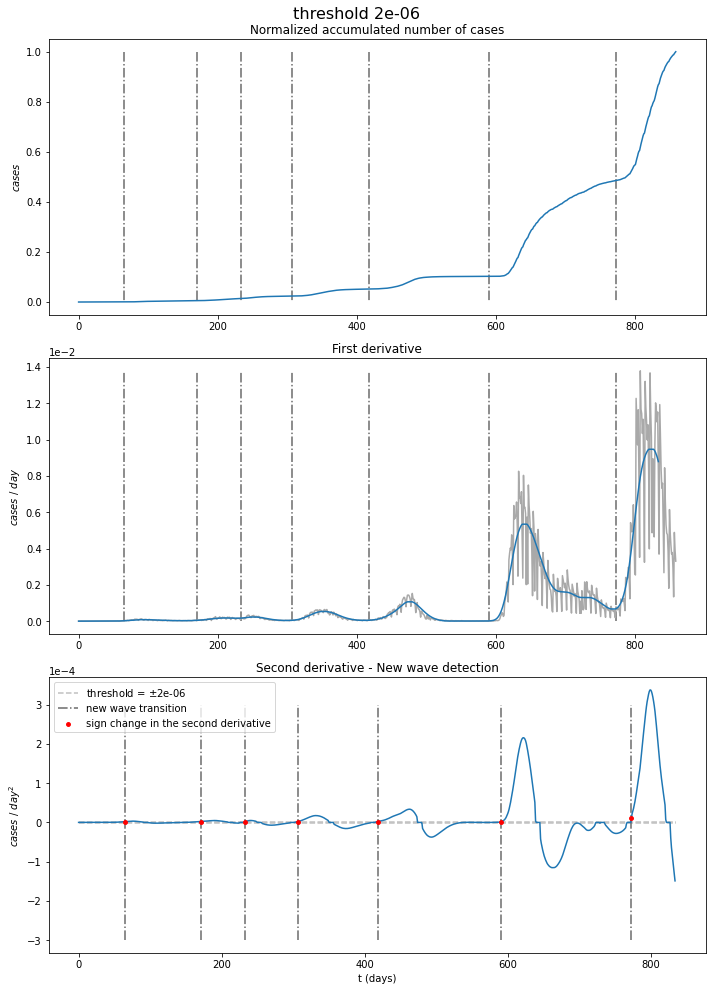

x_nw: [171, 233, 307, 418, 591]


In [6]:
# Transition Points
x_nw = get_transition_points(acc_data, visual=True, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:6]

print('x_nw:', x_nw)

========= Wave nr 1 =========
From 0 to  157
rRMSE:  0.012836186397599847
rRMSE Predictions:  0.06404450510964511
Parameters: [[19.318303354884797, 90.14907857953116, 21.277274921382663, 0.0010000000000000054]]
========= Wave nr 2 =========
From 0 to  219
rRMSE:  0.004815536420809157
rRMSE Predictions:  0.023214858321704234
Parameters: [[19.318303354884797, 90.14907857953116, 21.277274921382663, 0.0010000000000000054], [36.902367680724545, 205.52619260101486, 12.473181776263845, 1.0]]
========= Wave nr 3 =========
From 0 to  293


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


rRMSE:  0.0032996903523487852
rRMSE Predictions:  0.02156050731500918
Parameters: [[19.318303354884797, 90.14907857953116, 21.277274921382663, 0.0010000000000000054], [36.902367680724545, 205.52619260101486, 12.473181776263845, 1.0], [33.56395104204463, 252.85707987565692, 8.128632199924779, 1.0]]
========= Wave nr 4 =========
From 0 to  404
rRMSE:  0.0020921668802381397
rRMSE Predictions:  0.009495998595143254
Parameters: [[19.318303354884797, 90.14907857953116, 21.277274921382663, 0.0010000000000000054], [36.902367680724545, 205.52619260101486, 12.473181776263845, 1.0], [33.56395104204463, 252.85707987565692, 8.128632199924779, 1.0], [111.25711572293494, 350.2170930493824, 11.684252438844945, 1.0]]
========= Wave nr 5 =========
From 0 to  577


/home/fpelogia/Documentos/HMP/Implementações/Python/Organizado/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


rRMSE:  0.0027632344398753486
rRMSE Predictions:  0.0019571384476865564
Parameters: [[19.318303354884797, 90.14907857953116, 21.277274921382663, 0.0010000000000000054], [36.902367680724545, 205.52619260101486, 12.473181776263845, 1.0], [33.56395104204463, 252.85707987565692, 8.128632199924779, 1.0], [111.25711572293494, 350.2170930493824, 11.684252438844945, 1.0], [201.09474533878358, 471.5214715677373, 10.765971324704974, 1.0]]


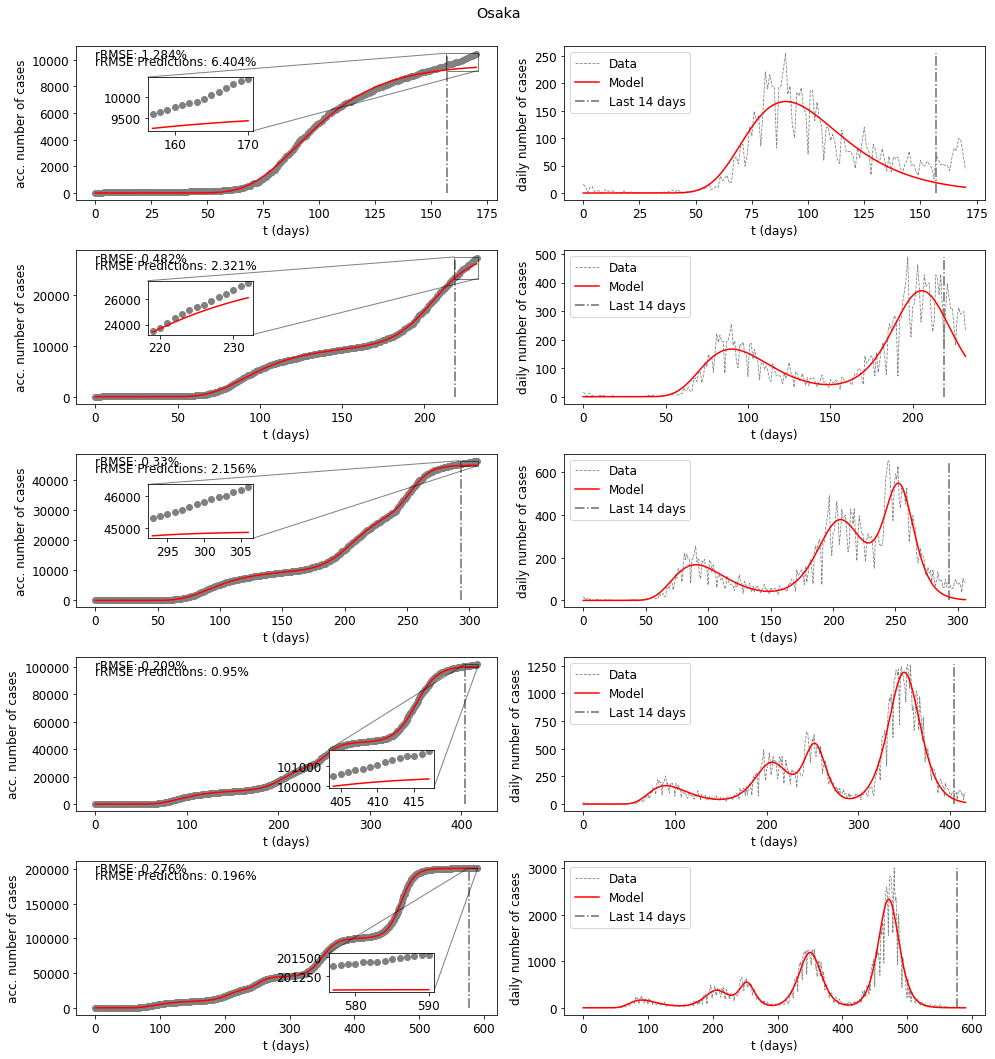

In [12]:
sig_params = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor
                            )

In [13]:
# Save model parameters
np.save(f'Pickle/{city_name}_{indicator}_parameters.npy', sig_params)